# data loading


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
import seaborn as sns
import re

In [5]:
df = pd.read_csv("C:\\Users\\hp\\OneDrive\\Desktop\\jobs.csv")

In [7]:
df

,job_id,job_role,company,experience,salary,location,rating,reviews,resposibilities,posted_on,job_link,company_link
0,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,"Kolkata, Hyderabad/Secunderabad, Pune, Ahmedab...",4.0,39110 Reviews,"Customer Service,Sales,Relationship Management",1 Day Ago,https://www.naukri.com/job-listings-branch-ban...,https://www.naukri.com/hdfc-bank-jobs-careers-213
1,6.012391e+10,Product Owner Senior Manager,Accenture,11-15 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Product management,Market analysis,Change mana...",1 Day Ago,https://www.naukri.com/job-listings-product-ow...,https://www.naukri.com/accenture-jobs-careers-...
2,6.012391e+10,Employee Relations and Policies Associate Manager,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...
3,6.012391e+10,Employee Relations and Policies Specialist,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...
4,6.012301e+10,SAP BO Consultant,Mindtree,5-7 Yrs,Not disclosed,"Hybrid - Kolkata, Hyderabad/Secunderabad, Pune...",4.1,3759 Reviews,"SAP BO,PL / SQL,Oracle SQL,SAP Business Object...",1 Day Ago,https://www.naukri.com/job-listings-sap-bo-con...,https://www.naukri.com/mindtree-jobs-careers-3...
...,...,...,...,...,...,...,...,...,...,...,...,...
79142,6.012301e+10,.Net Fullstack Developer,Citiustech,3-8 Yrs,"7,00,000 - 17,00,000 PA.","Hybrid - Pune, Bangalore/Bengaluru, Mumbai (Al...",4.0,742 Reviews,"c#,.net core,javascript,Microservices,Angular,...",2 Days Ago,https://www.naukri.com/job-listings-net-fullst...,https://www.naukri.com/citiustech-jobs-careers...
79143,1.122201e+10,Senior (BI) Business Intelligence Architect,Hexaware Technologies,10-13 Yrs,Not disclosed,"Hybrid - Pune, Chennai, Bangalore/Bengaluru, M...",3.7,3172 Reviews,"Informatica Mdm,etl,business intelligence,Agil...",1 Day Ago,https://www.naukri.com/job-listings-senior-bi-...,https://www.naukri.com/hexaware-technologies-j...
79144,1.512220e+11,PowerBI Developer,EY,5-10 Yrs,Not disclosed,"Hybrid - Pune, Mumbai (All Areas)",3.8,6267 Reviews,"pagination,Power Bi,Dax",2 Days Ago,https://www.naukri.com/job-listings-powerbi-de...,https://www.naukri.com/ey-jobs-careers-9156
79145,2.712220e+11,Customer Service Associate,Tech Mahindra,0-2 Yrs,"2,50,000 - 3,50,000 PA.","Temp. WFH - Noida, Kolkata, New Delhi, Hyderab...",3.7,21440 Reviews,"Bengali,International BPO,BPO,Customer Service...",10 Days Ago,https://www.naukri.com/job-listings-customer-s...,https://www.naukri.com/tech-mahindra-jobs-care...


# data exploration

In [14]:
#checking dimension
print("DataFrame shape: ",df.shape)

DataFrame shape:  (79147, 12)


In [16]:
#concise summary
print("DataFrame info: ")
df.info()

DataFrame info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79147 entries, 0 to 79146
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job_id           78667 non-null  float64
 1   job_role         78667 non-null  object 
 2   company          78666 non-null  object 
 3   experience       77398 non-null  object 
 4   salary           78667 non-null  object 
 5   location         77441 non-null  object 
 6   rating           42948 non-null  float64
 7   reviews          42948 non-null  object 
 8   resposibilities  78647 non-null  object 
 9   posted_on        78667 non-null  object 
 10  job_link         78667 non-null  object 
 11  company_link     78667 non-null  object 
dtypes: float64(2), object(10)
memory usage: 7.2+ MB


In [18]:
#categorical distribution
print("Location Distribution: ")
print(df['location'].value_counts(dropna=False))

Location Distribution: 
location
Bangalore/Bengaluru                                      10035
Hyderabad/Secunderabad                                    3736
Pune                                                      3216
Chennai                                                   2953
Mumbai                                                    2818
                                                         ...  
Hybrid - Hyderabad/Secunderabad, Delhi / NCR                 1
Hybrid - Hyderabad/Secunderabad, Chennai, Delhi / NCR        1
Hybrid - Noida, Hyderabad/Secunderabad                       1
Hyderabad/Secunderabad, Chennai, Greater Noida               1
Hybrid - Pondicherry/Puducherry, Salem, Chennai              1
Name: count, Length: 9039, dtype: int64


In [22]:
# Descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
             job_id        rating
count  7.866700e+04  42948.000000
mean   1.255071e+11      3.940144
std    1.097464e+11      0.519211
min    1.012200e+10      1.000000
25%    4.012350e+10      3.700000
50%    6.012350e+10      4.000000
75%    2.610226e+11      4.200000
max    3.112229e+11      5.000000


In [26]:
#salary distribution
print("Salary Distribution: ")
df['salary'] = pd.to_numeric(df['salary'] , errors = 'coerce') 

Salary Distribution: 


In [32]:
print(df['salary'].describe())


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: salary, dtype: float64


# data cleaning

In [35]:
#fixing column typo
df.rename(columns={'resposibilities': 'responsibilities'}, inplace=True)


In [41]:
# Extracting experience range
def extract_experience(exp):
    if pd.isna(exp) or 'Not' in exp:
        return (np.nan, np.nan)
    match = re.findall(r'(\d+)', exp)
    if len(match) == 2:
        return int(match[0]), int(match[1])
    elif len(match) == 1:
        return int(match[0]), np.nan
    return (np.nan, np.nan)

df[['exp_min', 'exp_max']] = df['experience'].apply(lambda x: pd.Series(extract_experience(x)))


In [43]:
#Cleaning  reviews column
df['reviews_count'] = df['reviews'].str.extract(r'(\d+)').astype(float)


In [71]:
#missing values summary
df.isnull().sum().sort_values(ascending=False)


salary              79147
rating              36199
reviews             36199
reviews_count       36199
experience           1749
exp_min              1749
exp_max              1749
location             1706
responsibilities      500
company               481
job_id                480
job_role              480
posted_on             480
job_link              480
company_link          480
dtype: int64

In [73]:
df['rating'] = df['rating'].fillna(df['rating'].median())
df = df.dropna(subset=['job_role', 'company'])  # essential columns


# descriptive analysis

## Top job roles

In [75]:
df['job_role'].value_counts().head(10)


job_role
Business Development Executive      305
Solution Architect                  278
Customer Service Associate          277
Sales Executive                     275
.Net Fullstack Developer            258
People Advisor Senior Analyst       256
SAP BO Consultant                   255
Business Development Manager        254
Senior Java BED ( PAN India)- KG    254
PowerBI Developer                   254
Name: count, dtype: int64

## Top companies hiring

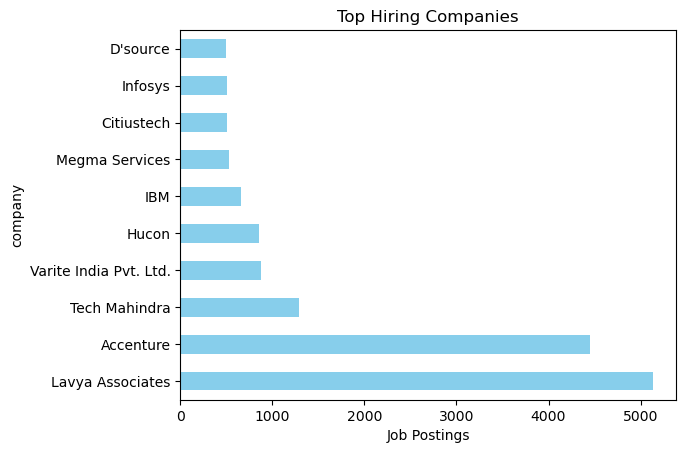

In [77]:
df['company'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title("Top Hiring Companies")
plt.xlabel("Job Postings")
plt.show()


## Most common locations

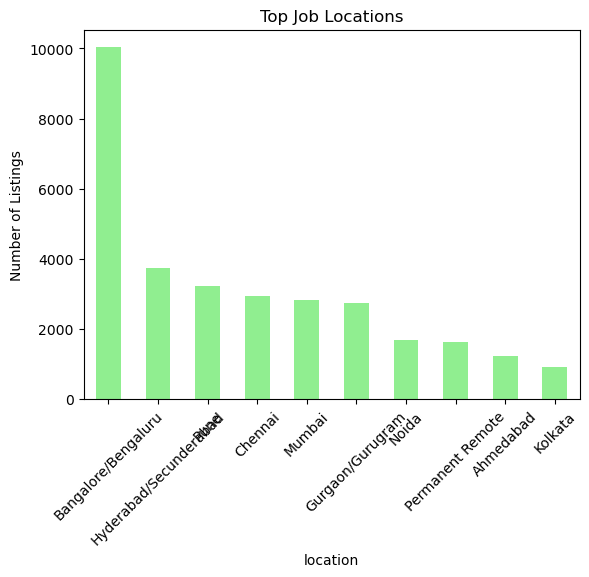

In [79]:
df['location'].value_counts().head(10).plot(kind='bar', color='lightgreen')
plt.title("Top Job Locations")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)
plt.show()


# Ratings and Experience Analysis

## Rating distribution

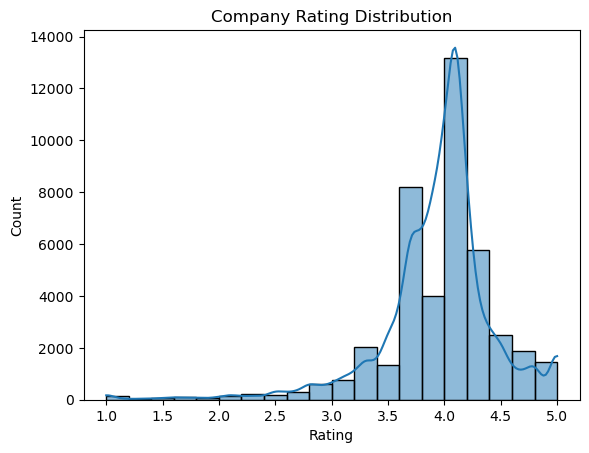

In [57]:
sns.histplot(df['rating'].dropna(), kde=True, bins=20)
plt.title("Company Rating Distribution")
plt.xlabel("Rating")
plt.show()


## Experience required (min years)

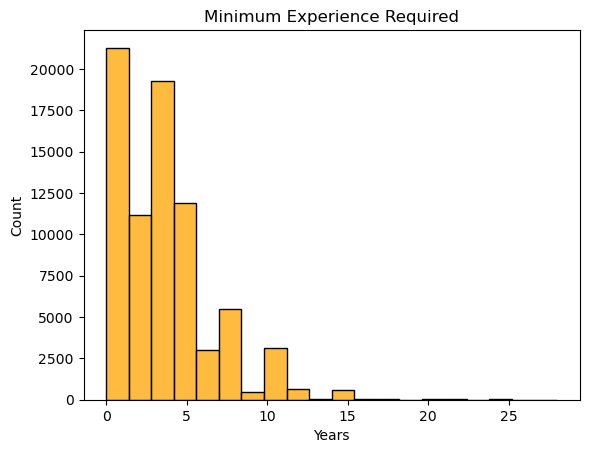

In [60]:
sns.histplot(df['exp_min'].dropna(), bins=20, color='orange')
plt.title("Minimum Experience Required")
plt.xlabel("Years")
plt.show()


# Salary Analysis (basic)

In [63]:
df['salary'].value_counts().head(10)

# How many have disclosed salaries
print("Disclosed salary count:", df[df['salary'] != 'Not disclosed'].shape[0])


Disclosed salary count: 79147


# Job Posting Trends

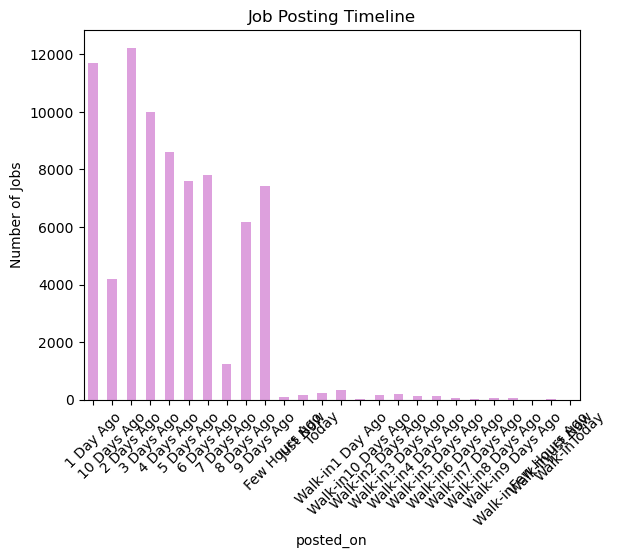

In [66]:
df['posted_on'].value_counts().sort_index().plot(kind='bar', color='plum')
plt.title("Job Posting Timeline")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=45)
plt.show()


# Keyword Extraction from Responsibilities

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

responsibilities = df['responsibilities'].dropna().astype(str)
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(responsibilities)
keywords = vectorizer.get_feature_names_out()

pd.DataFrame(X.sum(axis=0).tolist(), columns=keywords).T.sort_values(by=0, ascending=False)


,0
management,33021
sales,23610
business,12289
development,11492
team,9823
communication,9199
process,8750
customer,8095
skills,8086
channel,7991
